### HW4

__a)__

\begin{equation}
I_d = \beta(V_{gs} - V_{th})^2 \\
\beta = \frac{I_{DSS}}{V_{th}^2} \\
g_m = 2\cdot\sqrt{\beta I_D} \\
I_{D} = 2mA, I_G = 2pA, R_D = 4k\Omega,\beta = 24 mA/V^2, V_{gs} - V_{th} = 0.29V
\end{equation}

\begin{equation}
G = g_m ( R_D || r_o) \approx g_m R_D
\end{equation}

In [11]:
import numpy as np

q = 1.602e-19
kT = 1.38e-23*300

I_D = 2e-3
I_G = 2e-12
R_D = 4e3
beta = 24e-3
V_gs_th = 0.29

# first attempt to get G
g_m = 2 * np.sqrt(beta * I_D)
G = g_m * R_D

# second attempt to get G
V_th = -0.39 # from spice model
V_gs = 0.29 + V_th
i_ds = V_gs * g_m
v_ds = i_ds * R_D
G = v_ds / V_gs

# third attempt, this time including r_o
# without accounting for r_o, G is around 2dB off and the results are incorrect
Lambda = 0.046 # from spice model
r_o = 1 / (Lambda * I_D)
G = g_m * R_D * r_o / (R_D + r_o)

# R_D thermal voltage noise, input refer by /G
e2_nR_D = 4 * kT * R_D

# i_nd channel thermal current noise turns into voltage noise via R_D, input refer by /g_m
e2_nd = 4 * kT * 2 / (3 * g_m)

e2_n = e2_nd + e2_nR_D / G**2

# i_ng gate current shot noise
i2_ng = 2 * q * I_G
i2_n = i2_ng

display(f'e_n {np.sqrt(e2_n)} i_n {np.sqrt(i2_n)} G {G}')

'e_n 9.149294789663756e-10 i_n 8.004998438475799e-16 G 40.51580836418427'

__b)__
\begin{equation}
i_{nf}^2 = \frac{K_f\cdot I_D}{f} \\
K_f = 0.0021 fA
\end{equation}

\begin{equation}
i^2_{nd} = 4kTg_m \frac{2}{3}
\end{equation}

\begin{equation}
\frac{K_f\cdot I_D}{f} = 4kTg_m \frac{2}{3} \\
\frac{K_f\cdot I_D}{4kTg_m \frac{2}{3}} = f
\end{equation}

In [13]:
K_f = 0.0021e-15

f_c = K_f * I_D / (4 * kT * g_m * 2 / 3)

f_c

27.4555155185284

'e_nf(100Hz)=4.677071733467426e-10'

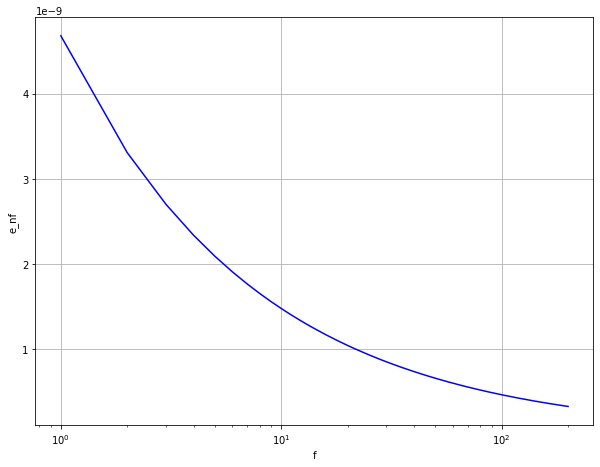

In [14]:
from matplotlib import pyplot as plt
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogx(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
f = np.linspace(1, 200, num=200)
i_nf = np.sqrt(K_f * I_D/f)/g_m
plot_xlogy(f, i_nf, "f", "e_nf")

display(f'e_nf(100Hz)={np.sqrt(K_f * I_D/100)/g_m}')

__c)__

4.171531141141916e-08

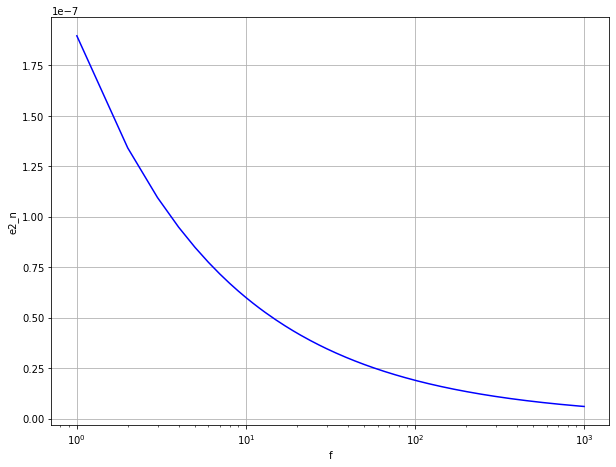

In [15]:
R_S = 100e3
f = np.linspace(1, 1000, num=1000)
G2 = G**2
gamma = 2/3
R_D2 = R_D**2
R_S2 = R_S**2
g_m2 = g_m**2

e2_nR_D = 4 * kT * R_D / G2

i2_nd = 4 * kT * gamma * g_m
e2_nd = i2_nd / g_m2

i2_ng = 2 * q * I_G
e2_ng = i2_ng * R_S2

i2_nf = K_f * I_D / f
e2_nf = i2_nf / g_m2

e2_n = e2_nR_D + e2_nd + e2_ng + e2_nf

gain = 20 * np.log10(G)

#display(f'gain={gain}dB e_n={np.sqrt(e2_n)}')

plot_xlogy(f, np.sqrt(e2_nf)*G, "f", "e2_n")
np.sqrt(e2_n[100]) * G

__d)__

In [16]:
I_d = beta * (V_gs_th ** 2)
V_out = 10 - I_d * R_D
display(f'V_out {V_out}V G {20*np.log10(G)}dB')


'V_out 1.9263999999999992V G 32.152490165912795dB'

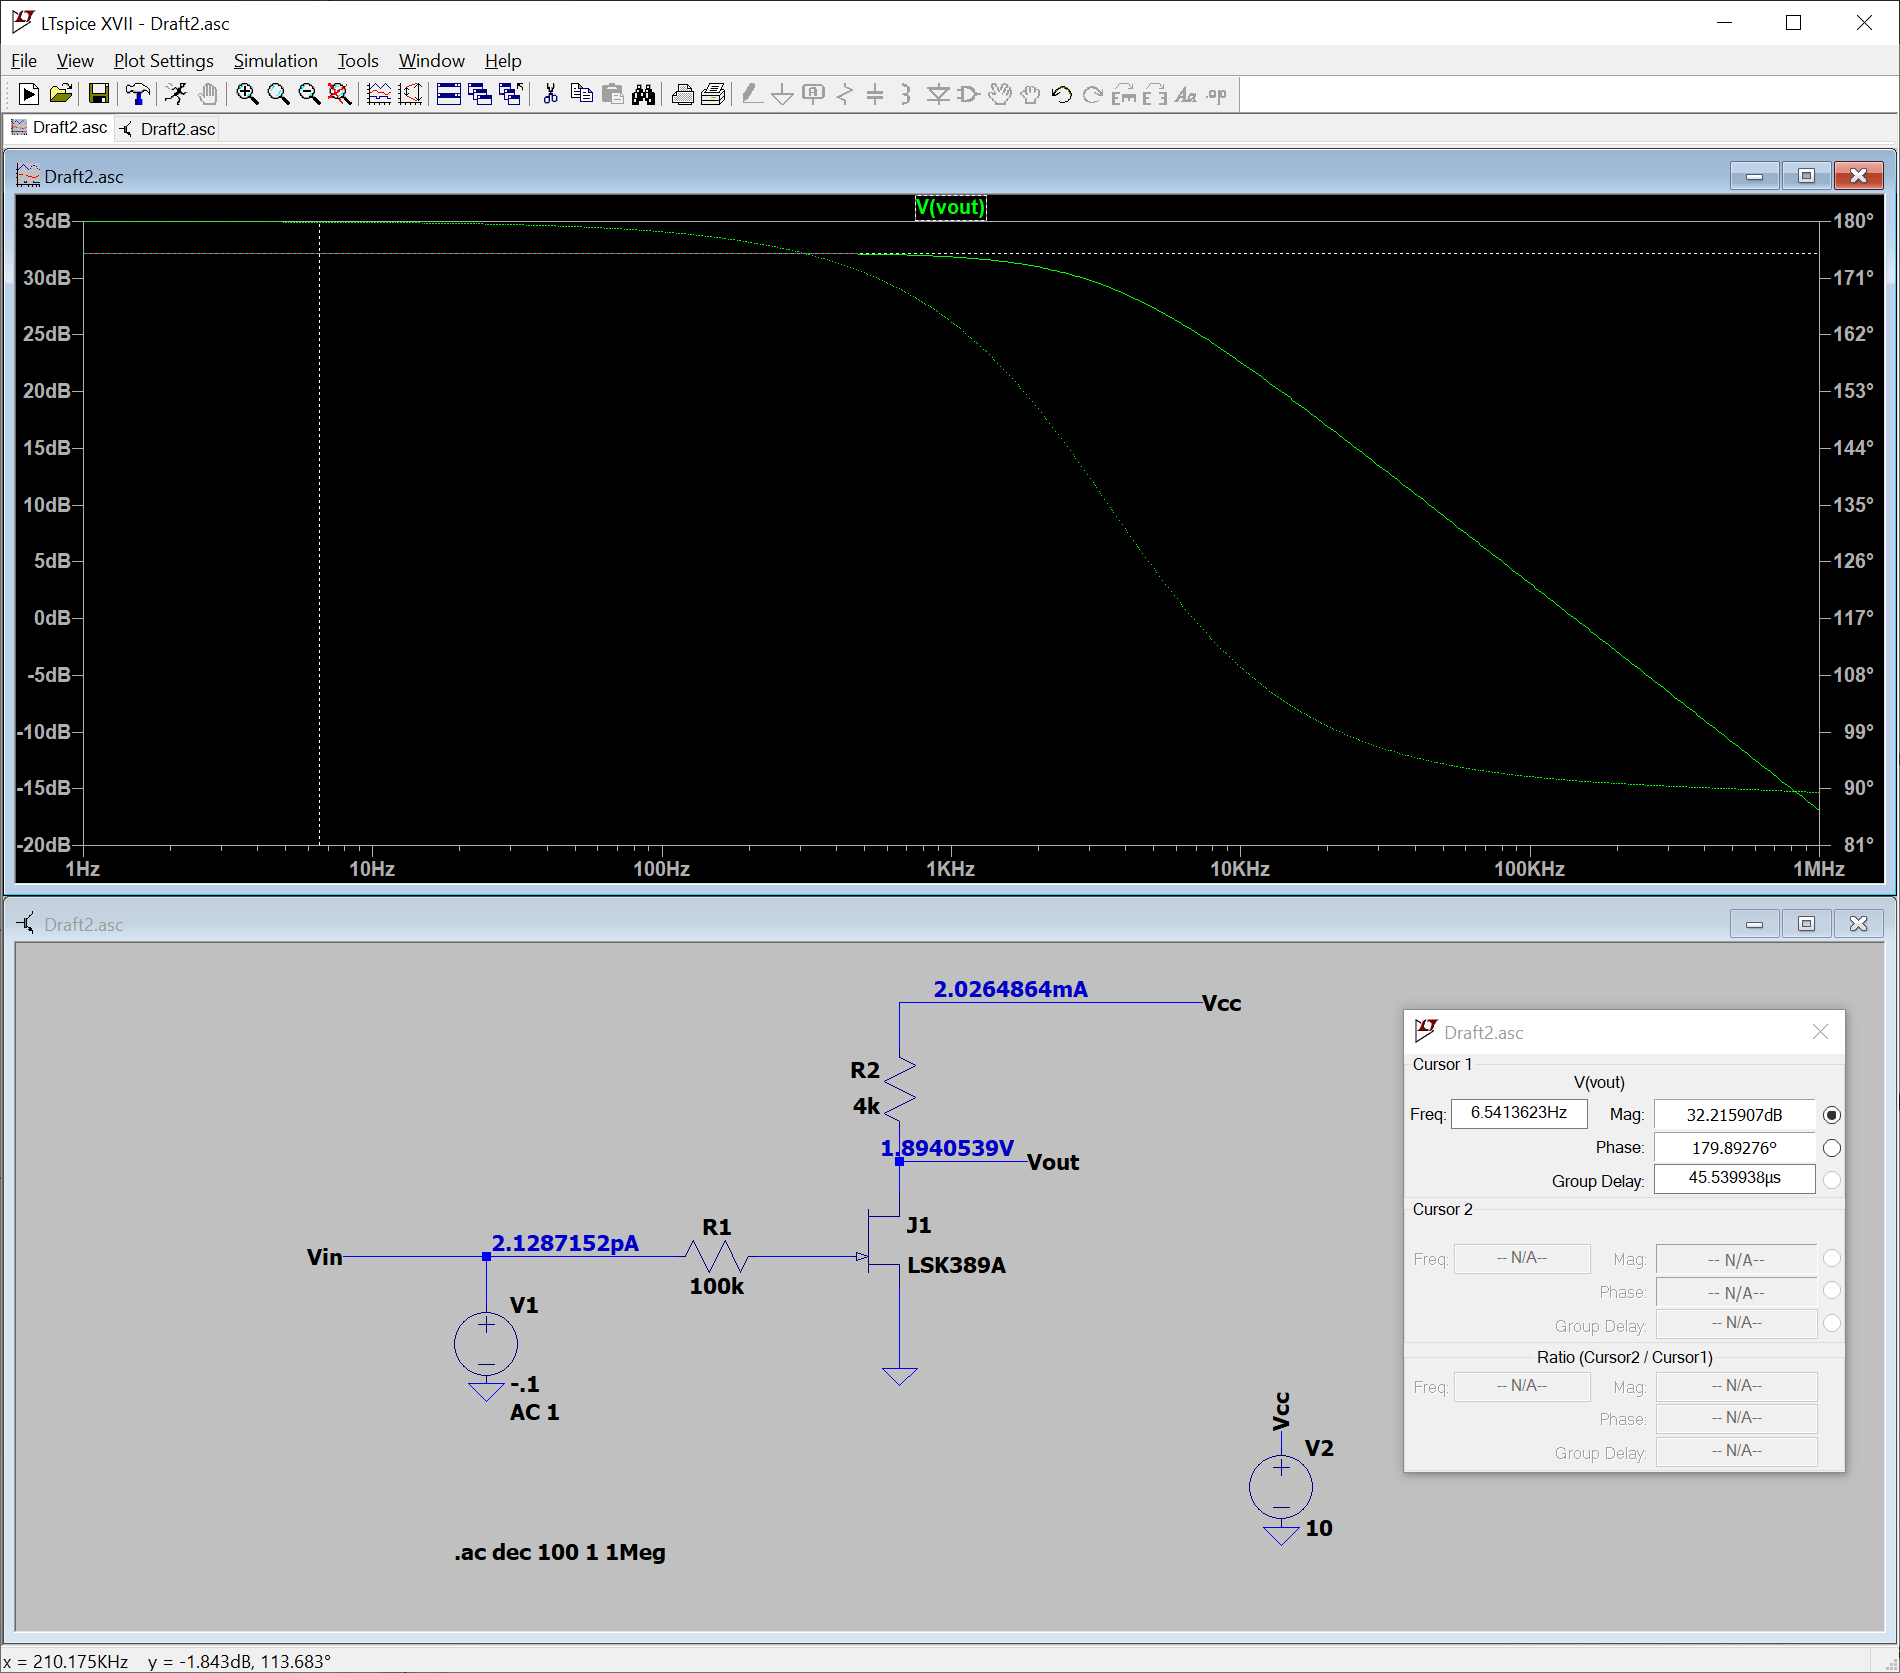

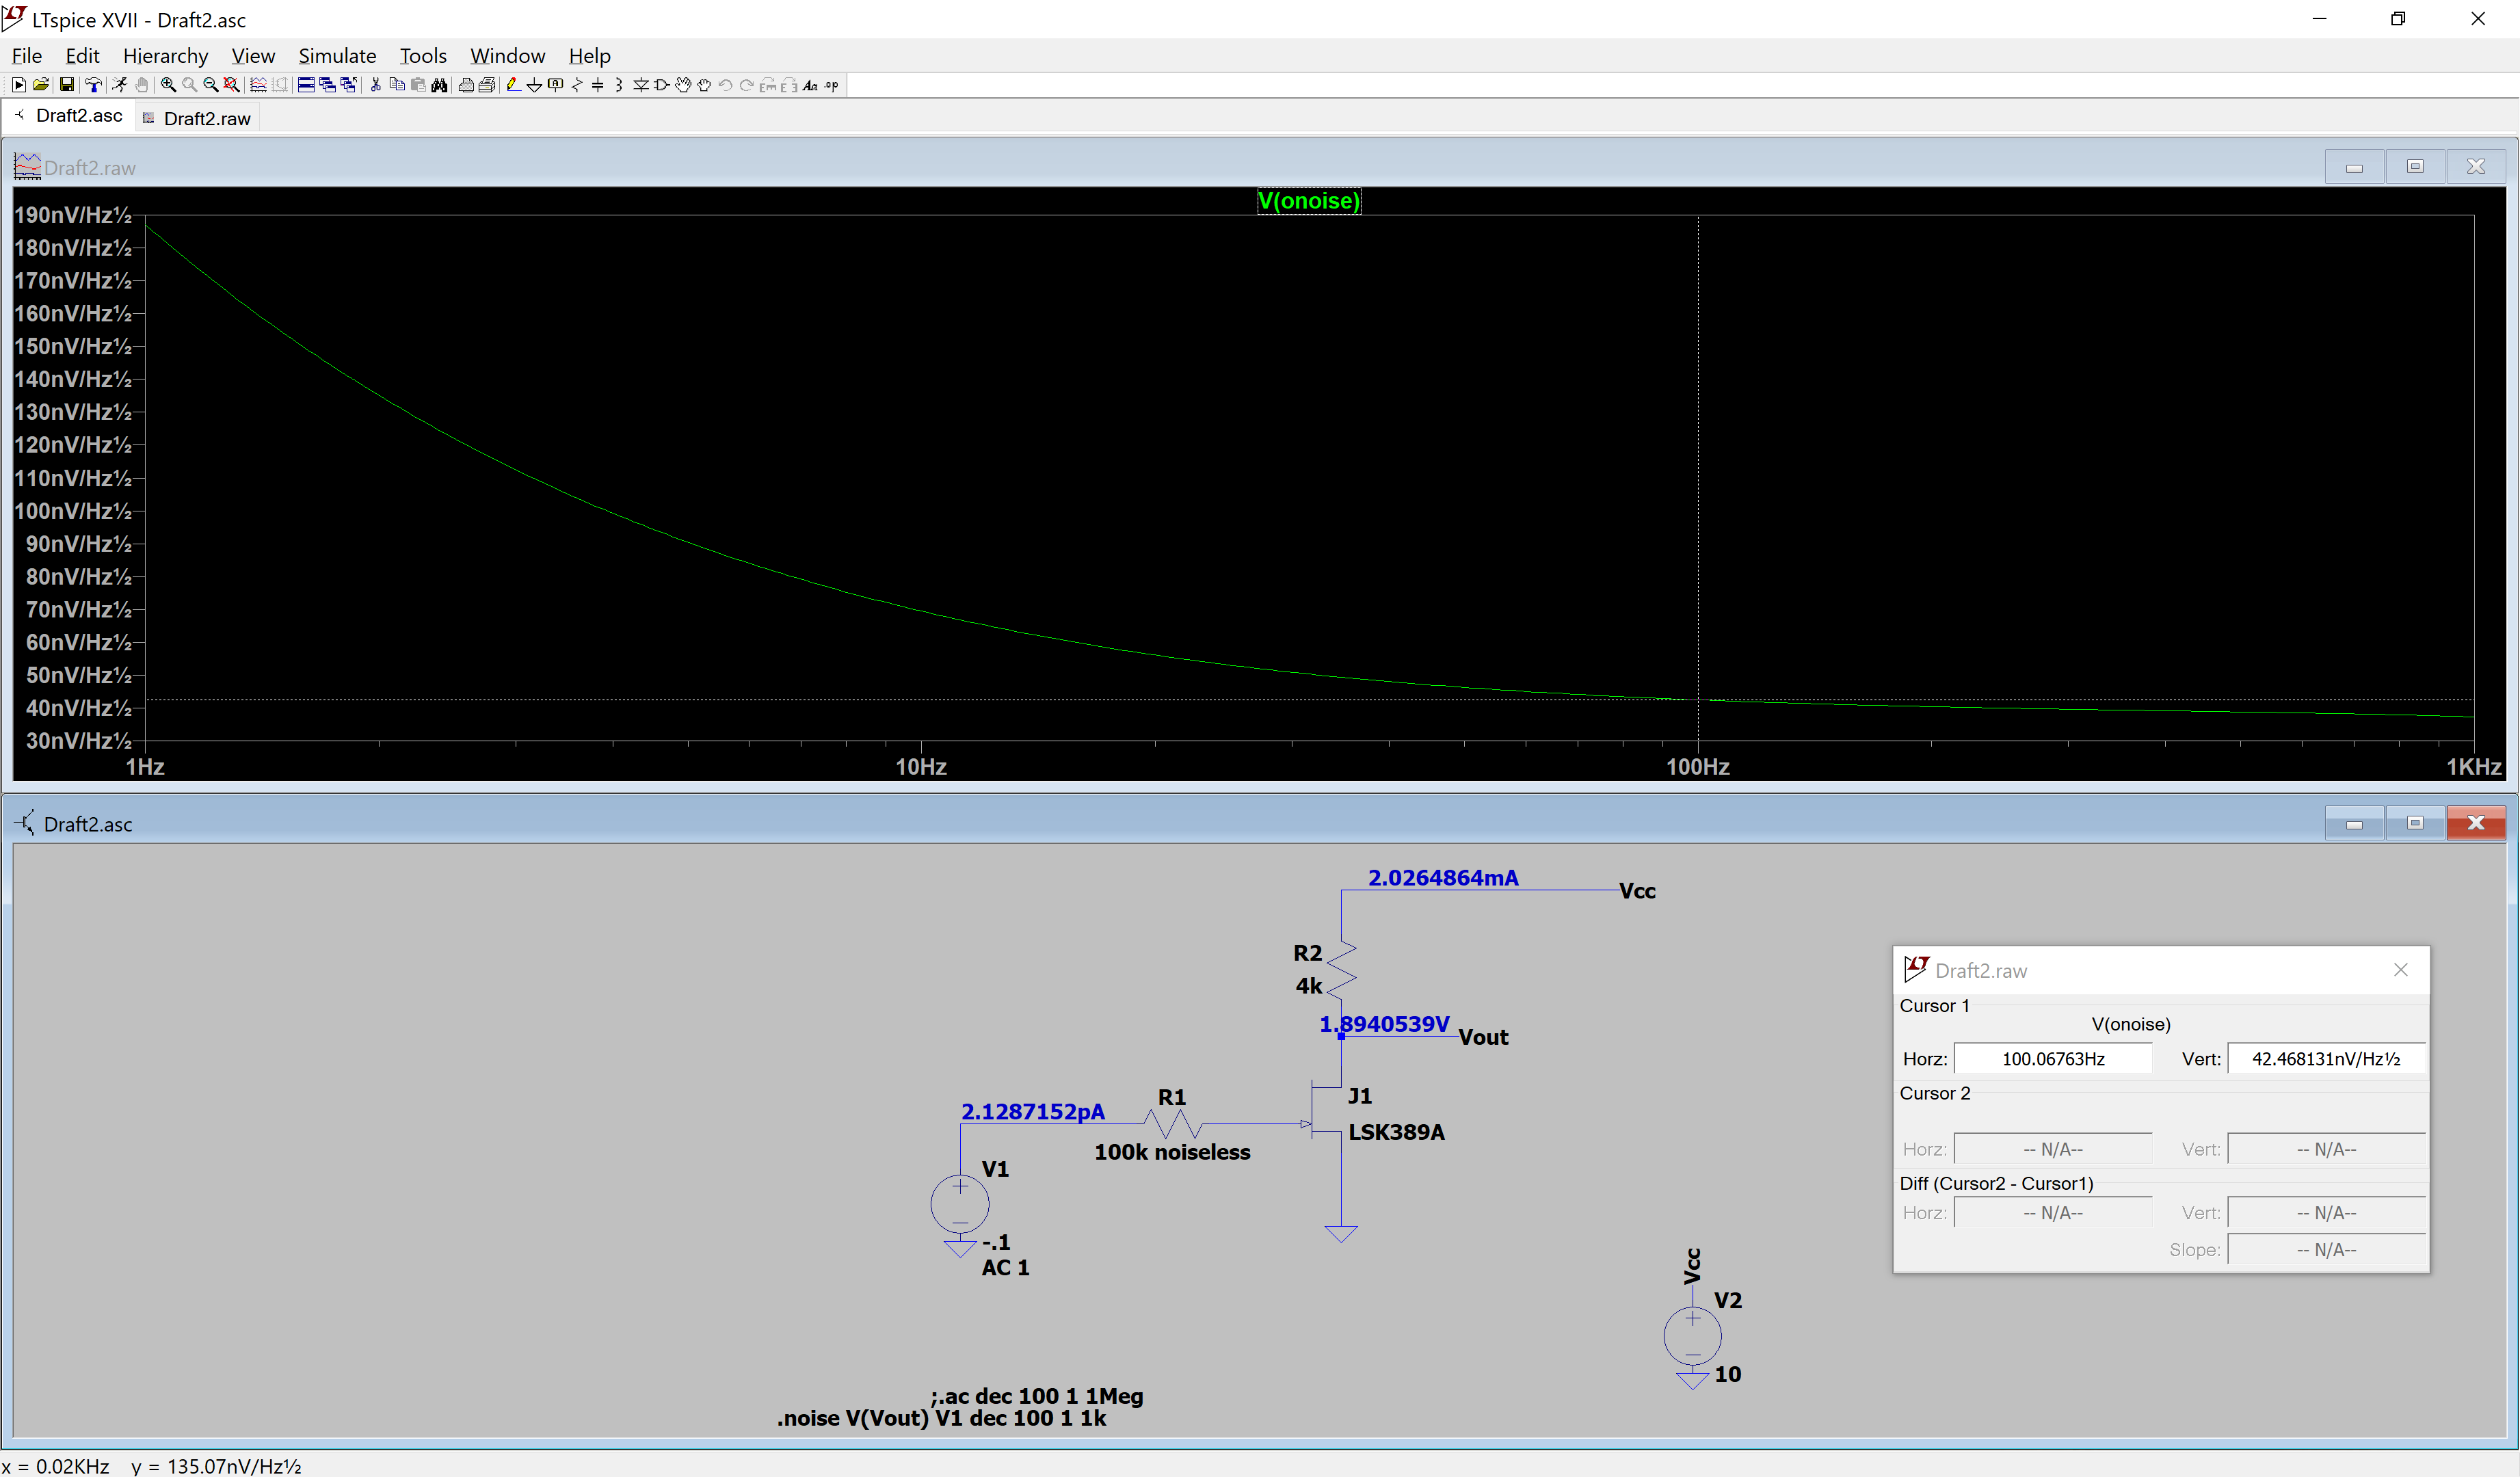

Raising the temperature to 150C increases the noise figure by almost 100x

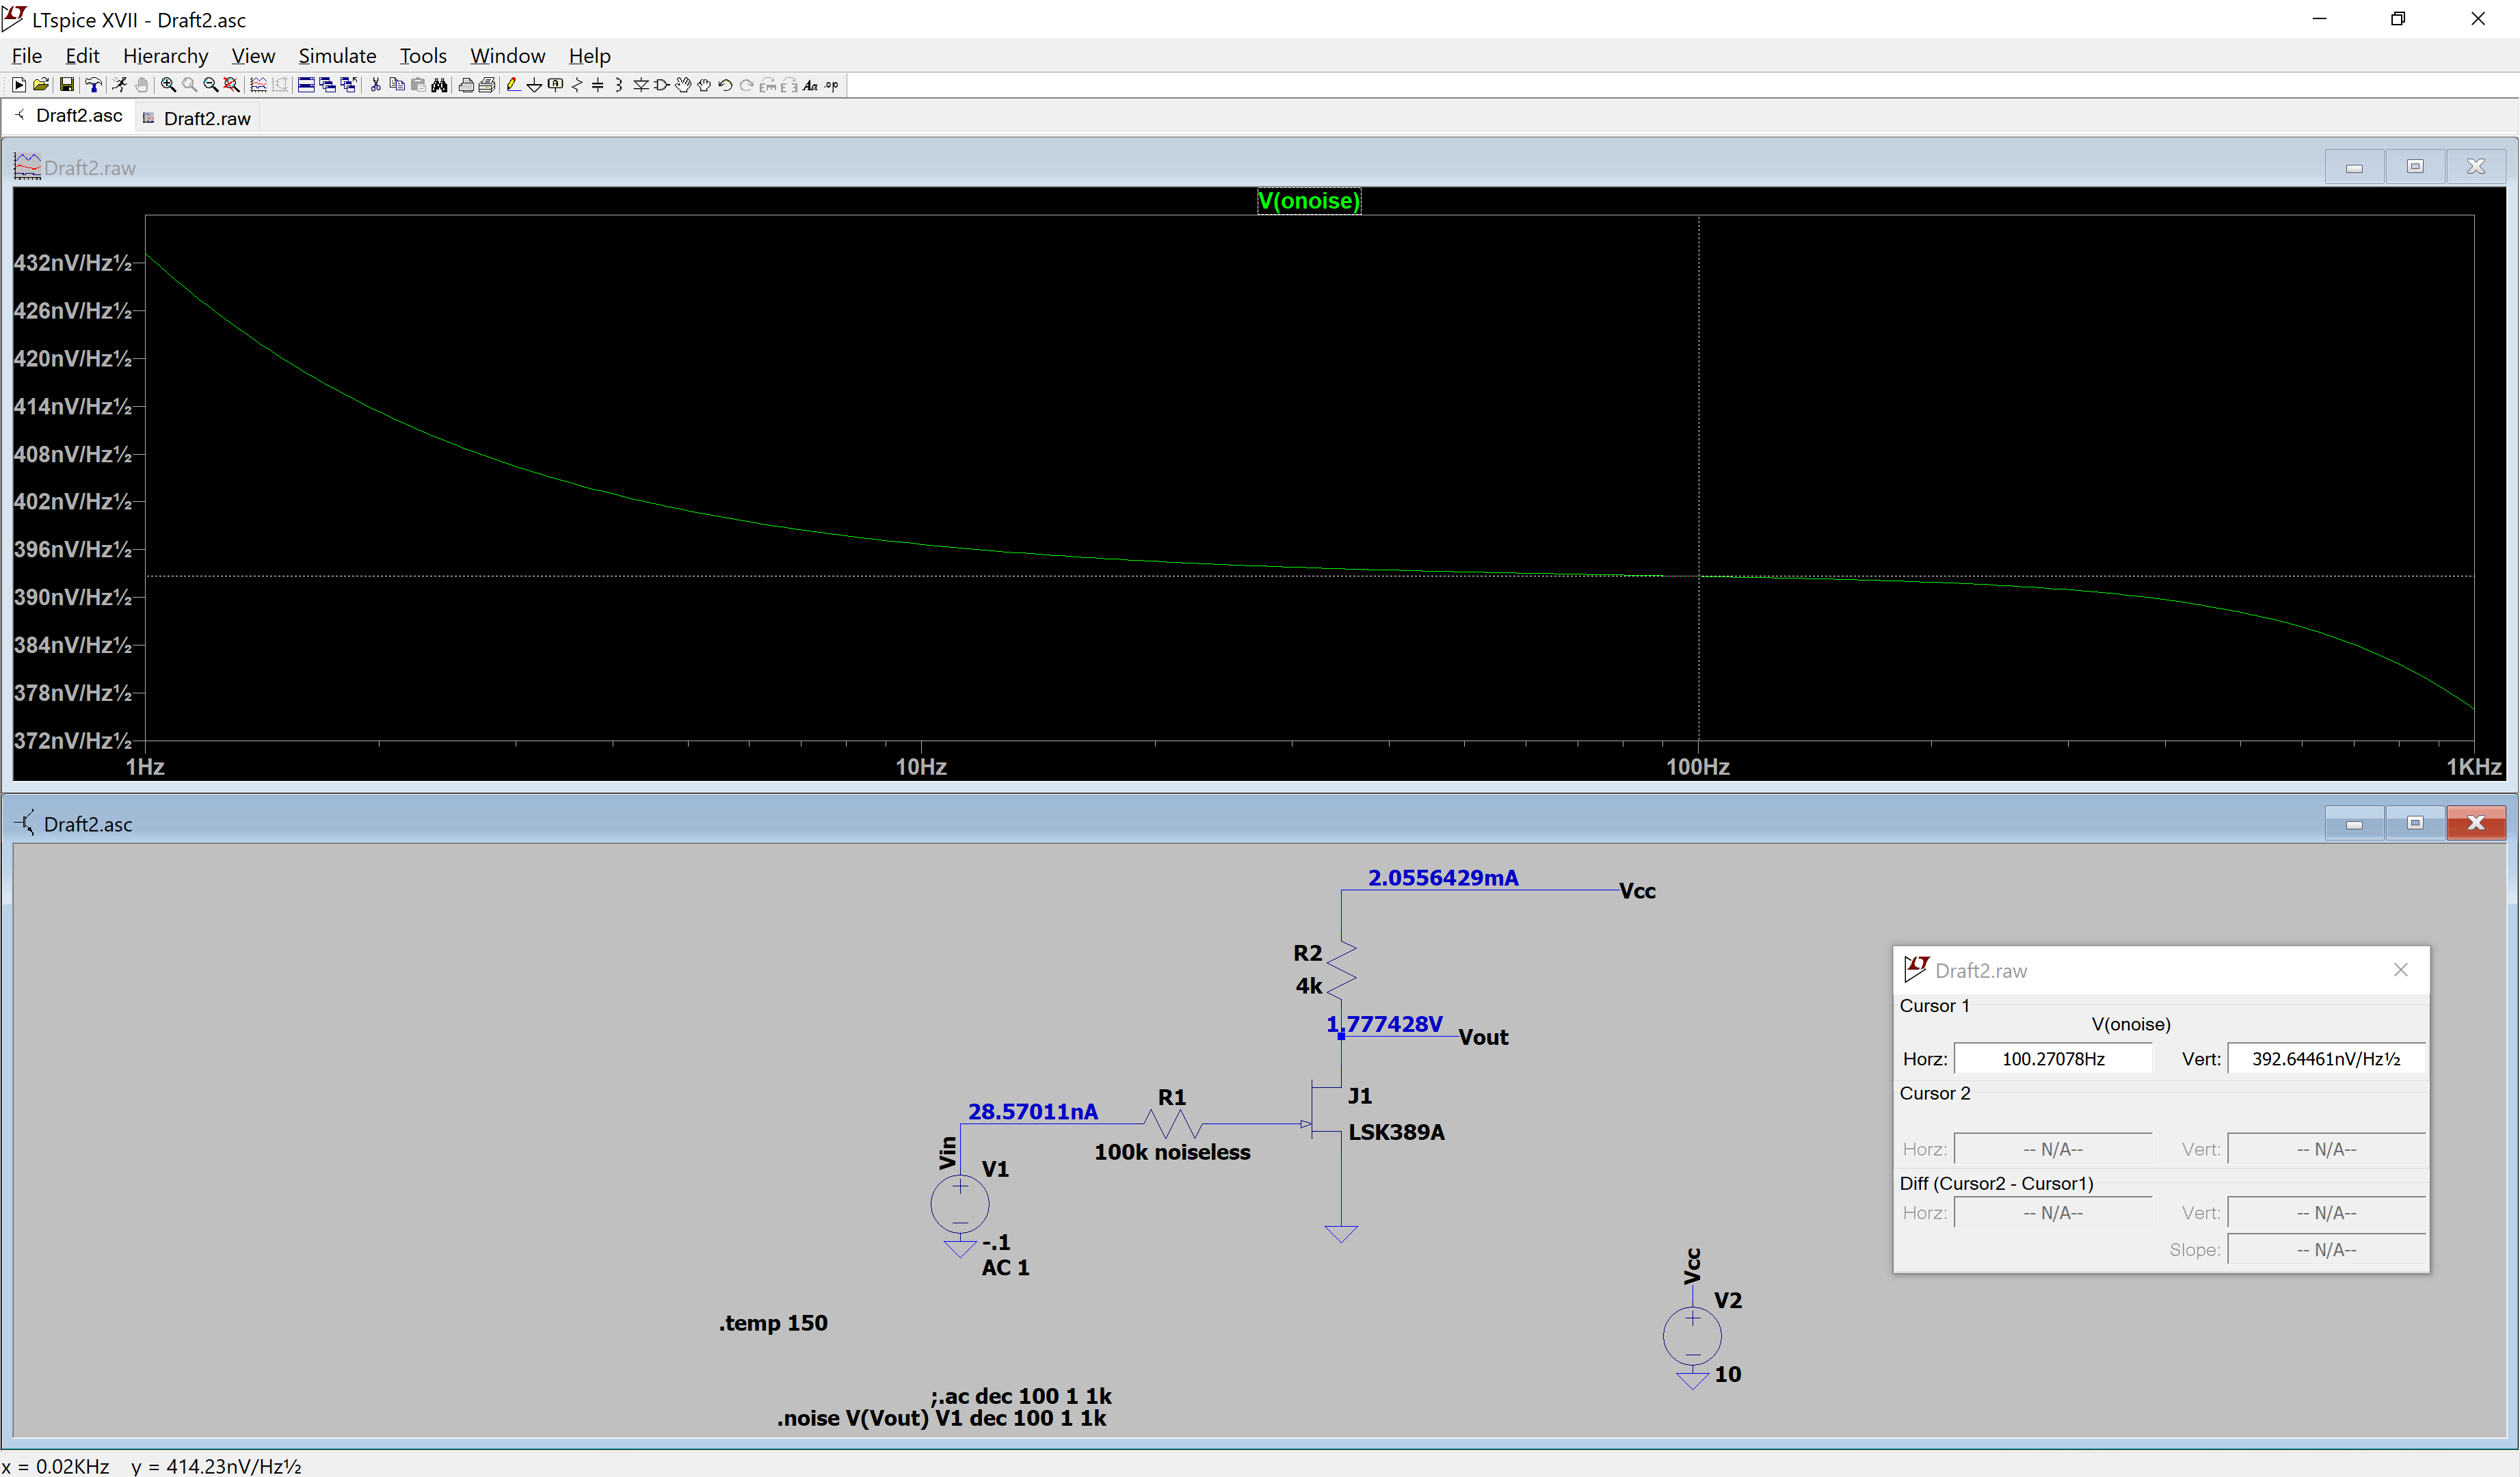